In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [21]:
temp_df = pd.read_csv("IMDB Dataset.csv")
df = temp_df.iloc[:15000]
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [22]:
df.shape

(15000, 2)

In [23]:
df.describe()

,review,sentiment
count,15000,15000
unique,14961,2
top,I have seen this film at least 100 times and I...,negative
freq,2,7609


In [24]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [25]:
df['sentiment'].value_counts()

sentiment
negative    7609
positive    7391
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

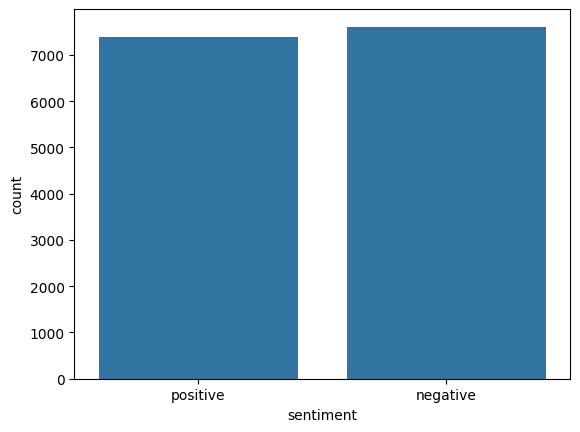

In [26]:
sns.countplot(x='sentiment',data=df)

In [27]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [28]:
df.duplicated().sum()

39

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative    7581   7581  Basically there's a family where a little boy ...   
positive    7380   7380  One of the other reviewers has mentioned that ...   

                
          freq  
sentiment       
negative     1  
positive     1

In [31]:
df['review_length'] = df['review'].apply(len)

In [32]:
df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


Text(0, 0.5, 'frequency')

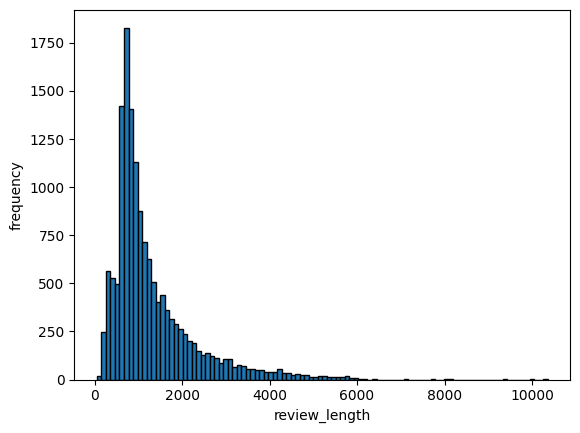

In [33]:
plt.hist(x='review_length',data=df,edgecolor = "black", bins = 100)
plt.xlabel('review_length')
plt.ylabel('frequency')

In [34]:
df = df.drop(columns=['review_length'])

In [35]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))
# Initialize the stemmer
stemmer = PorterStemmer()
# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and numbers (retain only alphabets and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Apply stemming
    stemmed_words = [stemmer.stem(word) for word in tokens]
    # Join the words back into a single string
    return ' '.join(stemmed_words)

# Apply preprocessing to the 'review' column
df['Cleaned_Review'] = df['review'].apply(preprocess_text)

# Check the processed data
df.head()

,review,sentiment,Cleaned_Review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod youll hook ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [36]:
df = df.drop(columns=['review'])

In [37]:
df.head()

,sentiment,Cleaned_Review
0,positive,one review mention watch oz episod youll hook ...
1,positive,wonder littl product film techniqu unassum old...
2,positive,thought wonder way spend time hot summer weeke...
3,negative,basic there famili littl boy jake think there ...
4,positive,petter mattei love time money visual stun film...


In [38]:
df = df[['Cleaned_Review', 'sentiment'] + [col for col in df.columns if col not in ['Cleaned_Review', 'sentiment']]]

In [40]:
df.head()

,Cleaned_Review,sentiment
0,one review mention watch oz episod youll hook ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


In [41]:
# split input and target feature
X = df.iloc[:,0:1]
y = df['sentiment']

In [42]:
X

,Cleaned_Review
0,one review mention watch oz episod youll hook ...
1,wonder littl product film techniqu unassum old...
2,thought wonder way spend time hot summer weeke...
3,basic there famili littl boy jake think there ...
4,petter mattei love time money visual stun film...
...,...
14995,bobcat goldthwait commend attempt someth diffe...
14996,sinc day clarissa explain ive bit crush meliss...
14997,travel coupl horton hamiltonstumbl onto town g...
14998,film deepli disappoint wender display limit mu...


In [138]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
14995    negative
14996    positive
14997    negative
14998    negative
14999    positive
Name: sentiment, Length: 14961, dtype: object

In [139]:
from sklearn.preprocessing import LabelEncoder
# label encode the sentiment data
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [140]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train.shape

(11968, 1)

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra"> Using Bag of word</div>

In [142]:
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train['Cleaned_Review']).toarray()
X_test_bow = cv.transform(X_test['Cleaned_Review']).toarray()

X_train_bow.shape

(11968, 68538)

<div style="text-align: center; color: green; font-size: 30px;">Training with GaussianNB</div>

In [143]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_bow,y_train)

GaussianNB()

In [144]:
y_pred = gnb.predict(X_test_bow)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.6491814233210825

In [145]:
confusion_matrix(y_test,y_pred)

array([[ 828,  675],
       [ 375, 1115]], dtype=int64)

<div style="text-align: center; color: green; font-size: 30px;">Training with Random Forest Classifier</div>

In [146]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8409622452388907

<div style="color: green; font-size: 30px;">Random Forest Classifier by selecting randomly frequent features</div>

In [147]:
cv = CountVectorizer(max_features=3000)

X_train_bow = cv.fit_transform(X_train['Cleaned_Review']).toarray()
X_test_bow = cv.transform(X_test['Cleaned_Review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.828600066822586

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra"> Using n-gram</div>

<div style="color: green; font-size: 30px;">Random Forest Classifier by selecting randomly frequent features</div>

In [148]:
cv = CountVectorizer(ngram_range=(1,2),max_features=5000)

X_train_bow = cv.fit_transform(X_train['Cleaned_Review']).toarray()
X_test_bow = cv.transform(X_test['Cleaned_Review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8392916805880387

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra"> Using TF-IDF</div>

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

X_train_tfidf = tfidf.fit_transform(X_train['Cleaned_Review']).toarray()
X_test_tfidf = tfidf.transform(X_test['Cleaned_Review'])

In [150]:
rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)

accuracy_score(y_test,y_pred)

0.8416304710992315

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra"> Using Word2vec</div>

In [151]:
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
story = []
for doc in df['Cleaned_Review']:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))
    
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [152]:
model.build_vocab(story)
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(8161491, 8868035)

In [153]:
len(model.wv.index_to_key)

30420

In [154]:
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc], axis=0)

document_vector(df['Cleaned_Review'].values[0])

array([-0.22216079,  0.21588066,  0.1525495 ,  0.08780981, -0.14527273,
       -0.3333028 ,  0.09562624,  0.6114862 , -0.3302231 , -0.20267086,
       -0.27634364, -0.46006182,  0.03760044,  0.00713412, -0.02840044,
       -0.2006849 ,  0.30048758, -0.44722962, -0.04057794, -0.65330255,
        0.21080136, -0.04317073, -0.01155751, -0.31151143, -0.25114065,
        0.14107117, -0.04522516, -0.42720458, -0.22252864,  0.38351294,
        0.3224233 , -0.21225731,  0.20566681, -0.33082753, -0.4079323 ,
        0.61737424, -0.1925275 , -0.31284449, -0.4988017 , -0.29531923,
       -0.01738122, -0.4103285 , -0.0144855 ,  0.13171017,  0.6055528 ,
       -0.17560856,  0.00195689, -0.5548953 ,  0.31170884,  0.19064432,
        0.20307459, -0.04971341, -0.05425449,  0.13987713, -0.4525641 ,
        0.02157563,  0.11183281,  0.00217243, -0.36390933,  0.03389595,
        0.20208979,  0.04228967,  0.05378788,  0.06820279, -0.23977788,
        0.22162135, -0.17276342,  0.25120336, -0.23097232,  0.25

In [155]:
from tqdm import tqdm
X = []
for doc in tqdm(df['Cleaned_Review'].values):
    X.append(document_vector(doc))

100%|███████████████████████████████████████████████████████████████████████████| 14961/14961 [01:49<00:00, 136.71it/s]


In [156]:
X = np.array(X)
X[0]

array([-0.22216079,  0.21588066,  0.1525495 ,  0.08780981, -0.14527273,
       -0.3333028 ,  0.09562624,  0.6114862 , -0.3302231 , -0.20267086,
       -0.27634364, -0.46006182,  0.03760044,  0.00713412, -0.02840044,
       -0.2006849 ,  0.30048758, -0.44722962, -0.04057794, -0.65330255,
        0.21080136, -0.04317073, -0.01155751, -0.31151143, -0.25114065,
        0.14107117, -0.04522516, -0.42720458, -0.22252864,  0.38351294,
        0.3224233 , -0.21225731,  0.20566681, -0.33082753, -0.4079323 ,
        0.61737424, -0.1925275 , -0.31284449, -0.4988017 , -0.29531923,
       -0.01738122, -0.4103285 , -0.0144855 ,  0.13171017,  0.6055528 ,
       -0.17560856,  0.00195689, -0.5548953 ,  0.31170884,  0.19064432,
        0.20307459, -0.04971341, -0.05425449,  0.13987713, -0.4525641 ,
        0.02157563,  0.11183281,  0.00217243, -0.36390933,  0.03389595,
        0.20208979,  0.04228967,  0.05378788,  0.06820279, -0.23977788,
        0.22162135, -0.17276342,  0.25120336, -0.23097232,  0.25

In [157]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(df['sentiment'])
y

array([1, 1, 1, ..., 0, 0, 1])

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8169061142666221

### If this helped in your learning, then please Support – as they are the source of motivation!

### Happy Learning